<a href="https://colab.research.google.com/github/Gapinian/Network-Science-ICN-2024/blob/main/S3_structure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 3
## Structural characterization of vertices, edges, and graphs

Vertices: PageRank

In [71]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.generators.random_graphs import powerlaw_cluster_graph

In [72]:
G = nx.generators.random_graphs.barabasi_albert_graph(10, 2)
coords = nx.circular_layout(G)
rank = nx.pagerank(G) # default damping
print(list(rank.items()))

[(0, 0.12108369355525794), (1, 0.17379166977488197), (2, 0.06841779097964644), (3, 0.12047042249457073), (4, 0.09771966735490759), (5, 0.06828766827575755), (6, 0.09211050038782975), (7, 0.09453756777230503), (8, 0.09490515977522855), (9, 0.06867585962961416)]


Printed above are ranks of every node. Since they are so small, we need to normalize them to define that the max here is a total max.

In [73]:
from math import log

# normalize to [0, 1] and logscale
low = min(rank.values())
high = max(rank.values())
span = high - low
rank = [ log((rank[v] - low) / span + 1) for v in G.nodes() ]

Log scale here normalizes the size of data (again, in our range of ranks the numbers are really small, so we need to make sure the range (from min to max ranking number) is the only set of numbers to evaluate.

In [74]:
opt = { 'node_size': 200,
        'width': 3,
        'with_labels': True,
        'font_color': 'black',
        'edge_color': 'blue' }

(-1.2099999868273736,
 1.2099999987483026,
 -1.1507783259899071,
 1.1507784150000355)

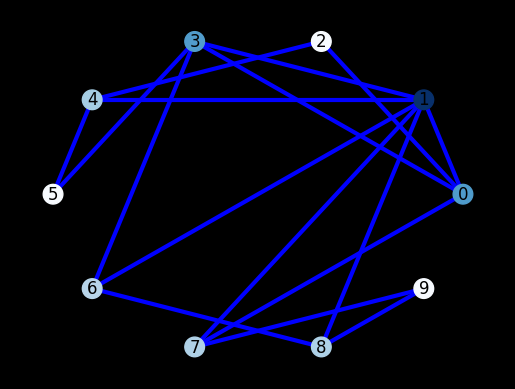

In [75]:
fig, ax = plt.subplots()
nx.draw(G,
        pos = coords,
        cmap = plt.get_cmap('Blues'), # https://matplotlib.org/stable/tutorials/colors/colormaps.html
        node_color = [ rank[v] for v in G.nodes() ], **opt)
ax.set_facecolor('black')
fig.set_facecolor('black')
ax.axis('off')

Edges: Betweenness

In [76]:
from networkx.algorithms.centrality import edge_betweenness_centrality
centrality = edge_betweenness_centrality(G)
print(list(centrality.items())[:3])

[((0, 1), 0.0962962962962963), ((0, 2), 0.13703703703703704), ((0, 3), 0.11296296296296296)]


In [77]:
# normalize to [0, 1]
low = min(centrality.values())
high = max(centrality.values())
span = high - low
weight = [(centrality[e] - low) / span for e in G.edges()]

<>:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:4: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:4: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-79-482c7a5bf1ad>:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if 'width' is opt:
<ipython-input-79-482c7a5bf1ad>:4: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if 'edge_color' is opt:


(-1.2099999868273736,
 1.2099999987483026,
 -1.1507783259899071,
 1.1507784150000355)

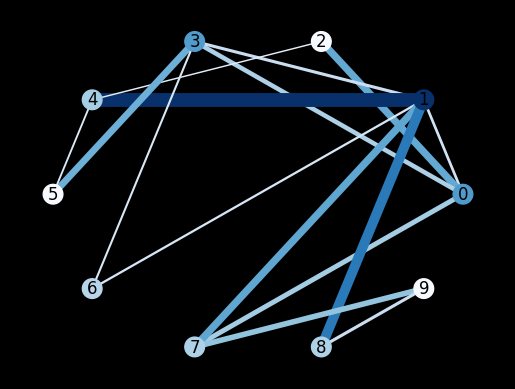

In [79]:
if 'width' is opt:
 del opt['width'] # discard
width = 10 # set a maximum
if 'edge_color' is opt:
 del opt['edge_color']
fig, ax = plt.subplots()
nx.draw(G,
        pos = coords,
        cmap = plt.get_cmap('Blues'),
        edge_cmap = plt.get_cmap('Blues'),
        node_color = rank,
        edge_color = weight,
        width = [width * w for w in weight] ,
        **opt)
ax.set_facecolor('black')
fig.set_facecolor('black')
ax.axis('off')